In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class positional_3D_encode(torch.nn.Module):

    def __init__(self,dim):
        super(positional_3D_encode, self).__init__()

        if dim%6 == 0:

            self.d_model = dim    #tamaño del vector de la salida
            self.d_out = dim
            
        else:
            self.d_out = dim
            self.d_model = dim + (6-((dim%6)))

        self.div_term = torch.exp(torch.arange(0, self.d_model, 6) * -(np.log(10000.0)/self.d_model))

    def forward(self,vec,cross=True):

        resultado = torch.zeros(self.d_model)

        position_x, position_y, position_z = vec

        res_sin_x = torch.sin(position_x*self.div_term)
        res_cos_x = torch.cos(position_x*self.div_term)

        res_sin_y = torch.sin(position_y*self.div_term)
        res_cos_y = torch.cos(position_y*self.div_term)

        res_sin_z = torch.sin(position_z*self.div_term)
        res_cos_z = torch.cos(position_z*self.div_term)

        if cross:
            resultado[0::6] = res_sin_x
            resultado[1::6] = res_cos_x

            resultado[2::6] = res_sin_y
            resultado[3::6] = res_cos_y

            resultado[4::6] = res_sin_z
            resultado[5::6] = res_cos_z

        else:
            resultado[0:self.d_model//6] = res_sin_x
            resultado[self.d_model//6:(self.d_model//6)*2] = res_cos_x

            resultado[(self.d_model//6)*2:(self.d_model//6)*3] = res_sin_y
            resultado[(self.d_model//6)*3:(self.d_model//6)*4] = res_cos_y

            resultado[(self.d_model//6)*4:(self.d_model//6)*5] = res_sin_z
            resultado[(self.d_model//6)*5:(self.d_model//6)*6] = res_cos_z

        return resultado[:self.d_out]

Esta clase permite codificar coordenadas 3D en un vector de N dimensiones (Embeddig), cuando se instancia la clase se le ingresa la dimensión del embedding con la cual se codificarán las coordenadas. En este caso se instancia en 3*14*14 ya que son las dimensiones de salida de la convolución de la red neuronal y el embedding del codificador debe coincidir con esta dimensión.

In [3]:
positional_encode = positional_3D_encode(3*14*14)

In [4]:
coordenadas = torch.tensor([100,500,10])
coordenadas = positional_encode(coordenadas)

In [5]:
# 3*14*14 = 588
coordenadas.shape

torch.Size([588])

Resultado de la codificación posicional en 3D, los valores van de 0 a 1, el sistema tiene entrelazados las codificaciones posicionales de X, Y y Z

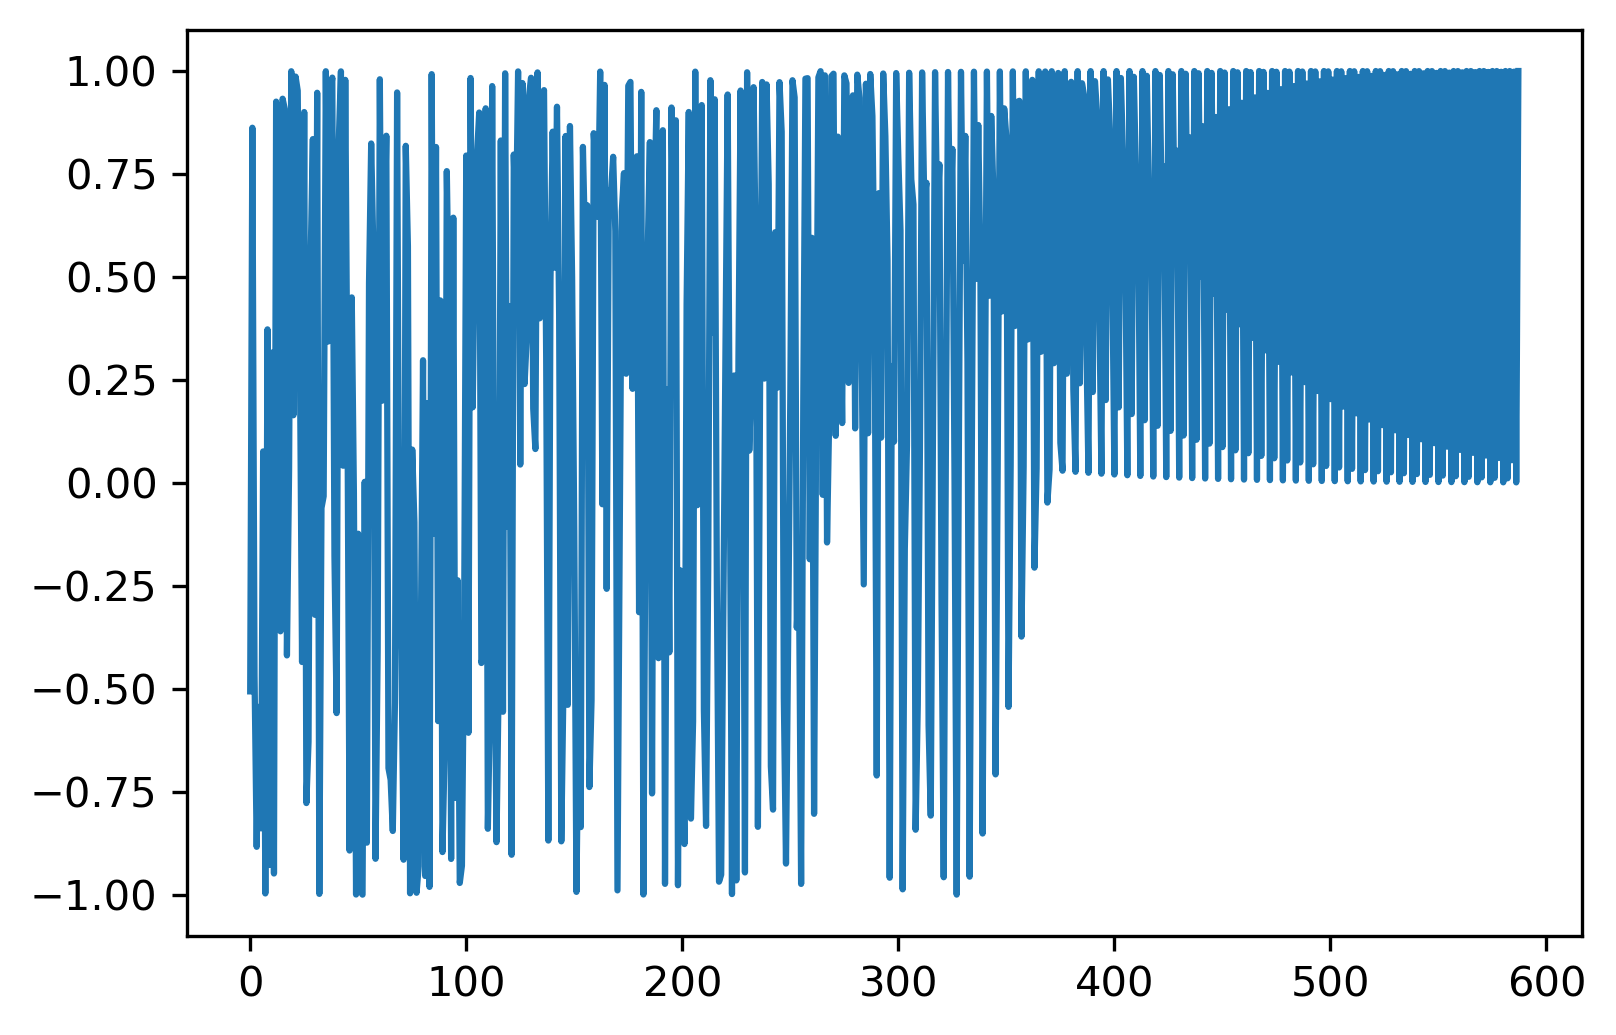

In [6]:
plt.figure(dpi=300)
plt.plot(coordenadas.numpy())
plt.show()

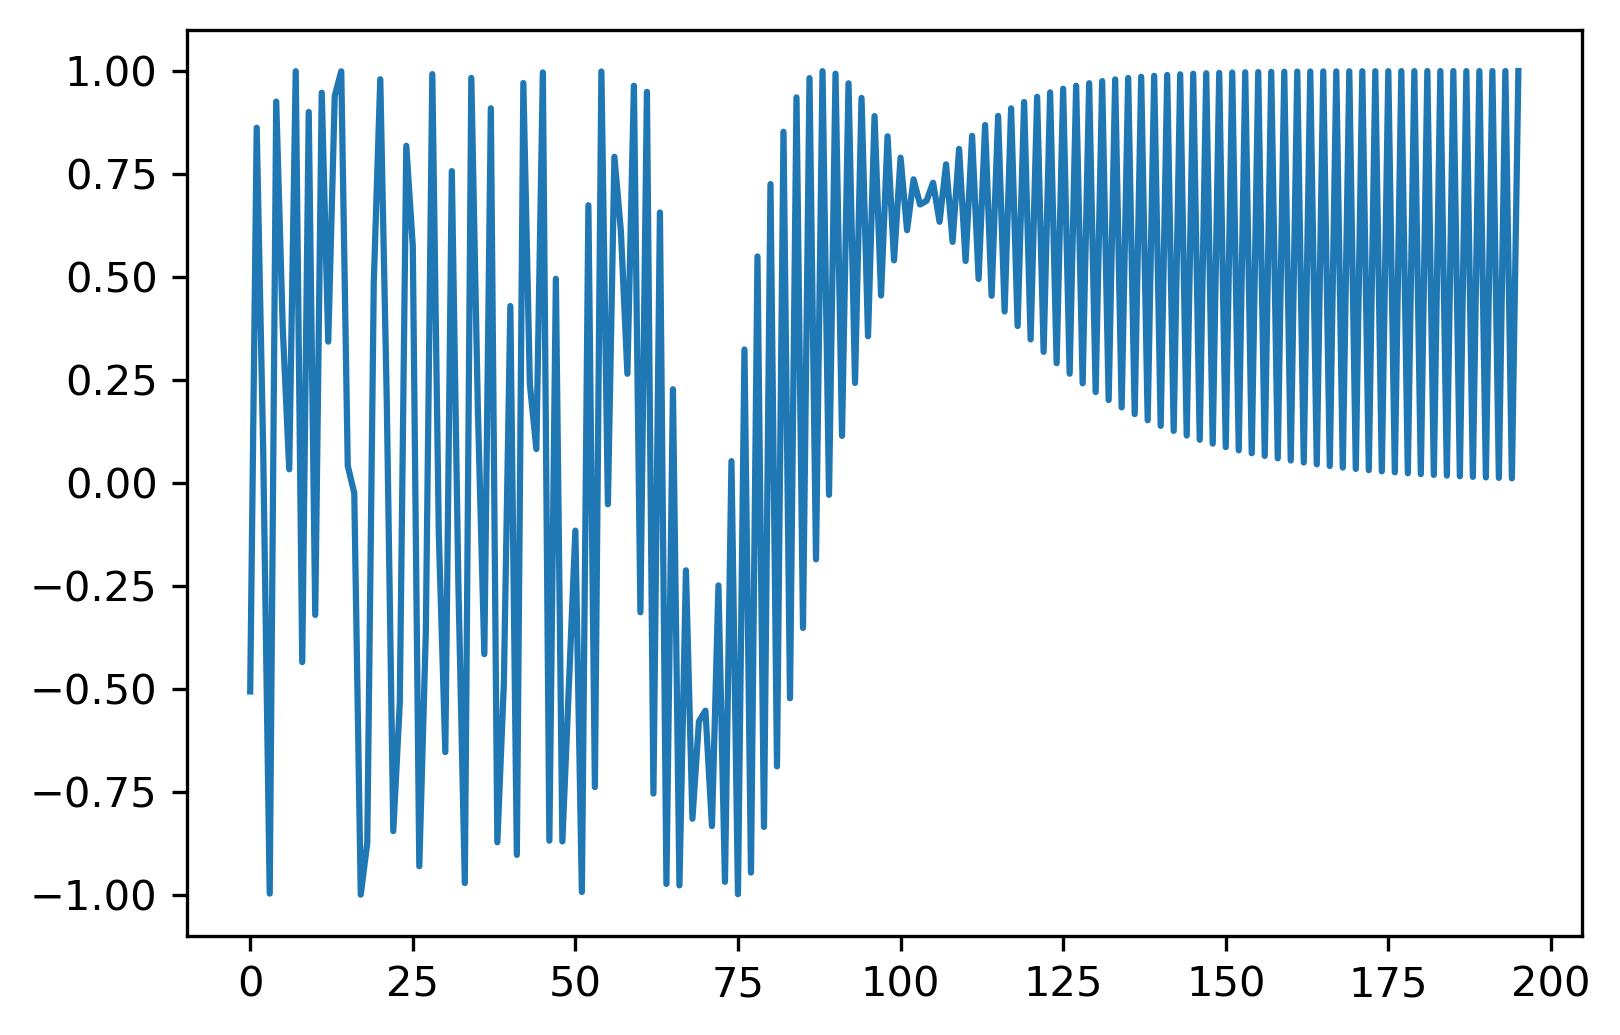

In [7]:
#Codificación posicional de la coordenada X aislada del resto

fragmento_sin_x = coordenadas.numpy()[0::6]
fragmento_cos_x = coordenadas.numpy()[1::6]

temp_x = np.zeros(98*2)
temp_x[0::2] = fragmento_sin_x
temp_x[1::2] = fragmento_cos_x

plt.figure(dpi=300)
plt.plot(temp_x)
plt.show()

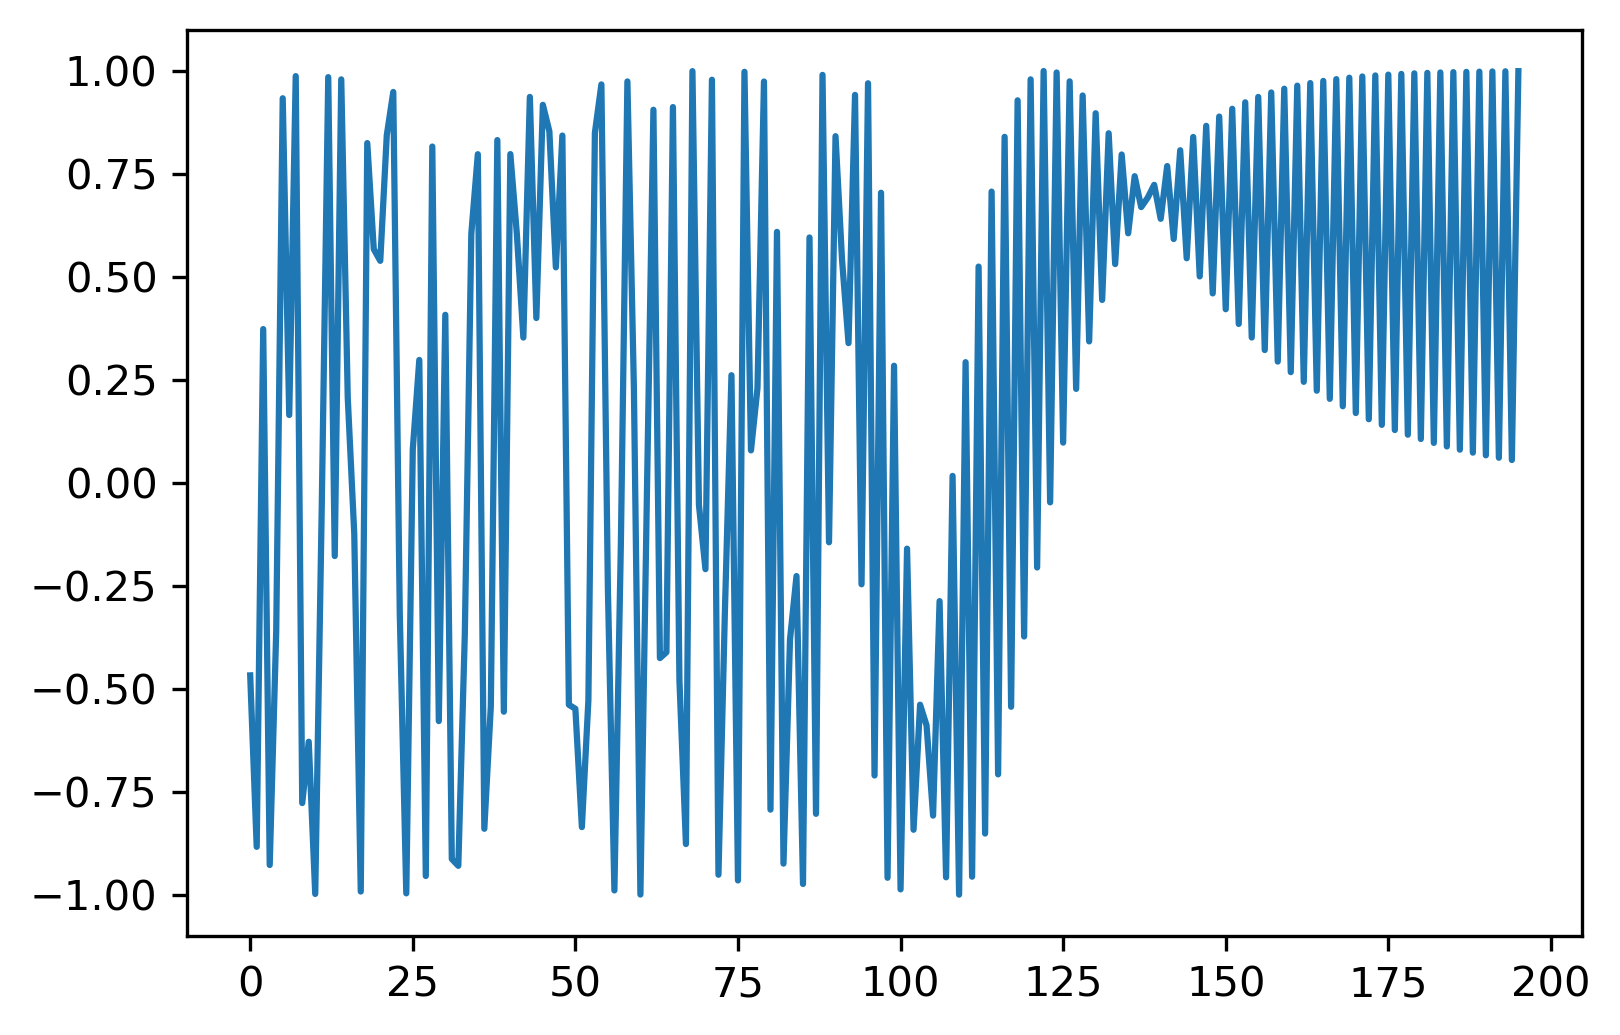

In [8]:
#Codificación posicional de la coordenada Y aislada del resto

fragmento_sin_y = coordenadas.numpy()[2::6]
fragmento_cos_y = coordenadas.numpy()[3::6]

temp_y = np.zeros(98*2)
temp_y[0::2] = fragmento_sin_y
temp_y[1::2] = fragmento_cos_y

plt.figure(dpi=300)
plt.plot(temp_y)
plt.show()

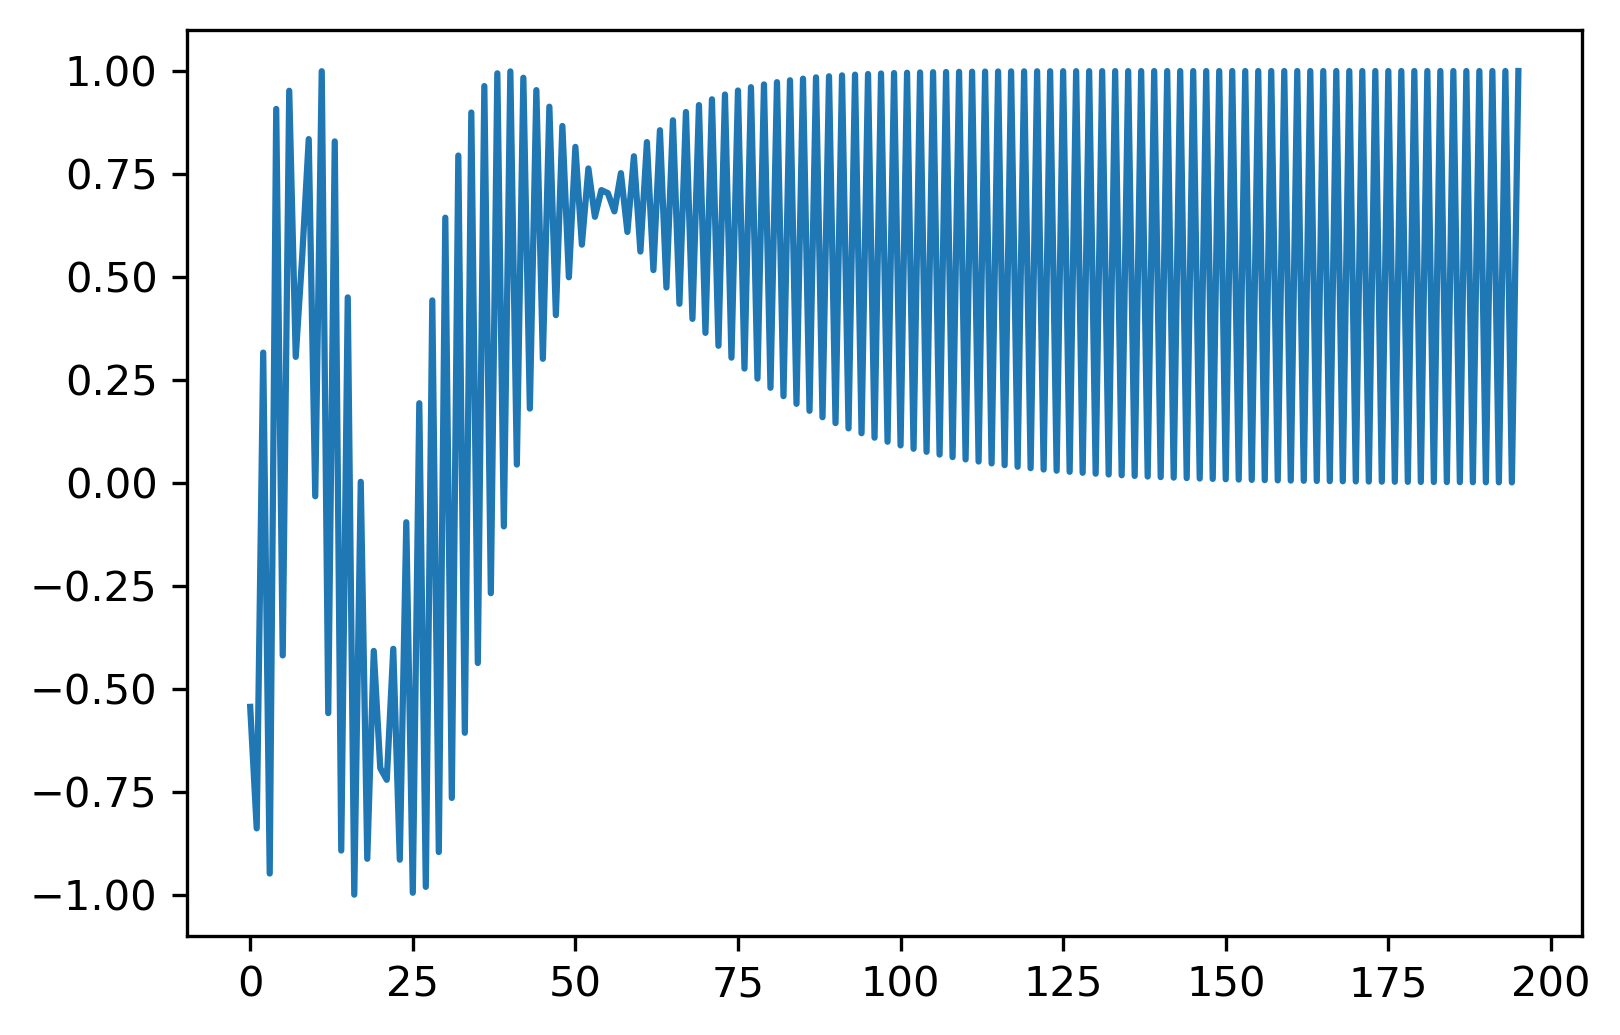

In [9]:
#Codificación posicional de la coordenada Z aislada del resto

fragmento_sin_z = coordenadas.numpy()[4::6]
fragmento_cos_z = coordenadas.numpy()[5::6]

temp_z = np.zeros(98*2)
temp_z[0::2] = fragmento_sin_z
temp_z[1::2] = fragmento_cos_z

plt.figure(dpi=300)
plt.plot(temp_z)
plt.show()